# Chapter 6: Learning Best Practices for Model Evaluation and Hyperparameter Tuning


In [1]:
from IPython.display import Image
%matplotlib inline

## Previous chapters

We learned about the essential machine learning algorithms for classification and how to get our data into shape before we feed it into those algorithms. 
- Chapter 1:  Ability to Learn
  
- Chapter 2: Training ML for Classification
  
- Chapter 3: Tour of ML classifiers using Sklearn
  
- Chapter 4: Building good training dataset
  
- Chapter 5: Compressing data via Dimensionality reduction
  


> Now, it’s time to learn about the best practices of building good machine learning models by fine-tuning the algorithms and evaluating the performance of the models. I

- Assess the performance of machine learning models 
  
- Diagnose the common problems of machine learning algorithms 
  
- Fine-tune machine learning models 
  
- Evaluate predictive models using different performance metrics

# Streamlining workflows with pipelines

- We will learn useful tool: Pipeline class in scikit-learn. 

- It allows us to fit a model including an arbitrary number of transformation steps and apply it to make predictions about new data.

## Loading the Breast Cancer Wisconsin dataset

- We will be working with the Breast Cancer Wisconsin dataset, which contains 569 examples of malignant and benign tumor cells. 

- The first two columns in the dataset store the unique ID numbers of the examples and the corresponding diagnoses (M = malignant, B = benign), respectively. 

- Columns 3-32 contain 30 real-valued features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant.

### Reading the da

In [2]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)

# if the Breast Cancer dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df = pd.read_csv('wdbc.data', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.shape

(569, 32)

<hr>

### Preprocessing the data

> we will assign the 30 features to a NumPy array, X. Using a LabelEncoder object, we will transform the class labels from their original string representation ('M' and 'B') into integers:

In [7]:
from sklearn.preprocessing import LabelEncoder

X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

After encoding the class labels (diagnosis) in an array, y, the malignant tumors are now represented as class 1, and the benign tumors are represented as class 0, respectively. We can double-check this mapping by calling the transform method of the fitted LabelEncoder on two dummy class labels:

In [9]:
pd.DataFrame(y) 

,0
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [7]:
le.transform(['M', 'B'])

array([1, 0])

#### Dividing the dataset

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

## Combining transformers and estimators in a pipeline

- Since the features in the Breast Cancer Wisconsin dataset are measured on various different scales, we will standardize the columns in the Breast Cancer
  
- Lets assume that we want compress the data into a lower two-dimensional using Principal Component Analyis(PCA)

In [14]:
df.shape[1]
# len(df.columns)

32

Example without Pipline

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression())

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
test_acc = pipe_lr.score(X_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

Test accuracy: 0.956


- The make_pipeline function takes an arbitrary number of scikit-learn transformers (objects that support the fit and transform methods as input), followed by a scikit-learn estimator that implements the fit and predict methods. 

- In our preceding code example, we provided two scikit-learn transformers, StandardScaler and PCA, and a LogisticRegression estimator as inputs to the make_pipeline function, which constructs a scikit-learn Pipeline object from these objects

- If we call the fit method of Pipeline, the data will be passed down a series of transformers via fit and transform calls on these intermediate steps until it arrives at the estimator object (the final element in a pipeline). 

- The estimator will then be fitted to the transformed training data. 
  
- When we executed the fit method on the pipe_lr pipeline in the preceding code example, StandardScaler first performed fit and transform calls on the training data. Second, the transformed training data was passed on to the next object in the pipeline, PCA. Similar to the previous step, PCA also executed fit and transform on the scaled input data and passed it to the final element of the pipeline, the estimator.

- Finally, the LogisticRegression estimator was fit to the training data after it underwent transformations via StandardScaler and PCA. Again, we should note that there is no limit to the number of intermediate steps in a pipeline; however, if we want to use the pipeline for prediction tasks, the last pipeline element has to be an estimator. 



> Similar to calling fit on a pipeline, pipelines also implement a predict method if the last step in the pipeline is an estimator. If we feed a dataset to the predict call of a Pipeline object instance, the data will pass through the intermediate steps via transform calls. In the final step, the estimator object will then return a prediction on the transformed data.

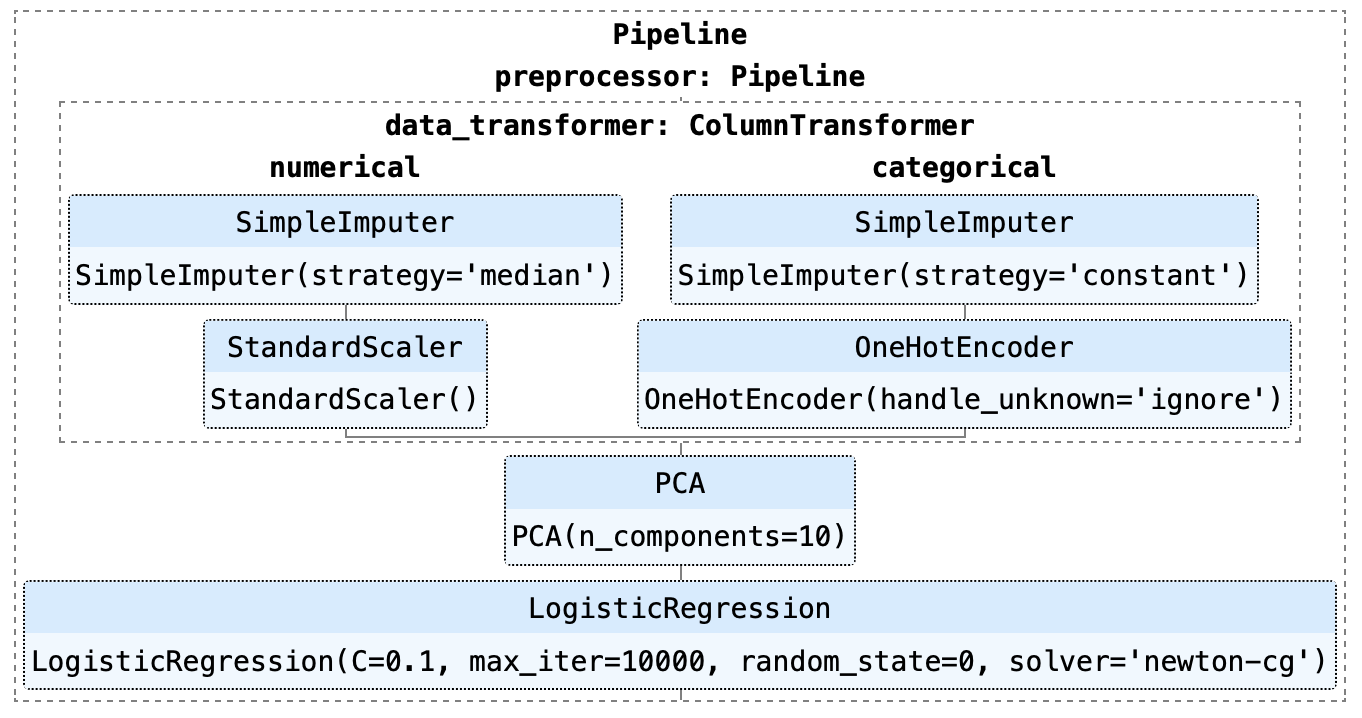

In [16]:
Image(filename='figures/workflow.png', width=500) 

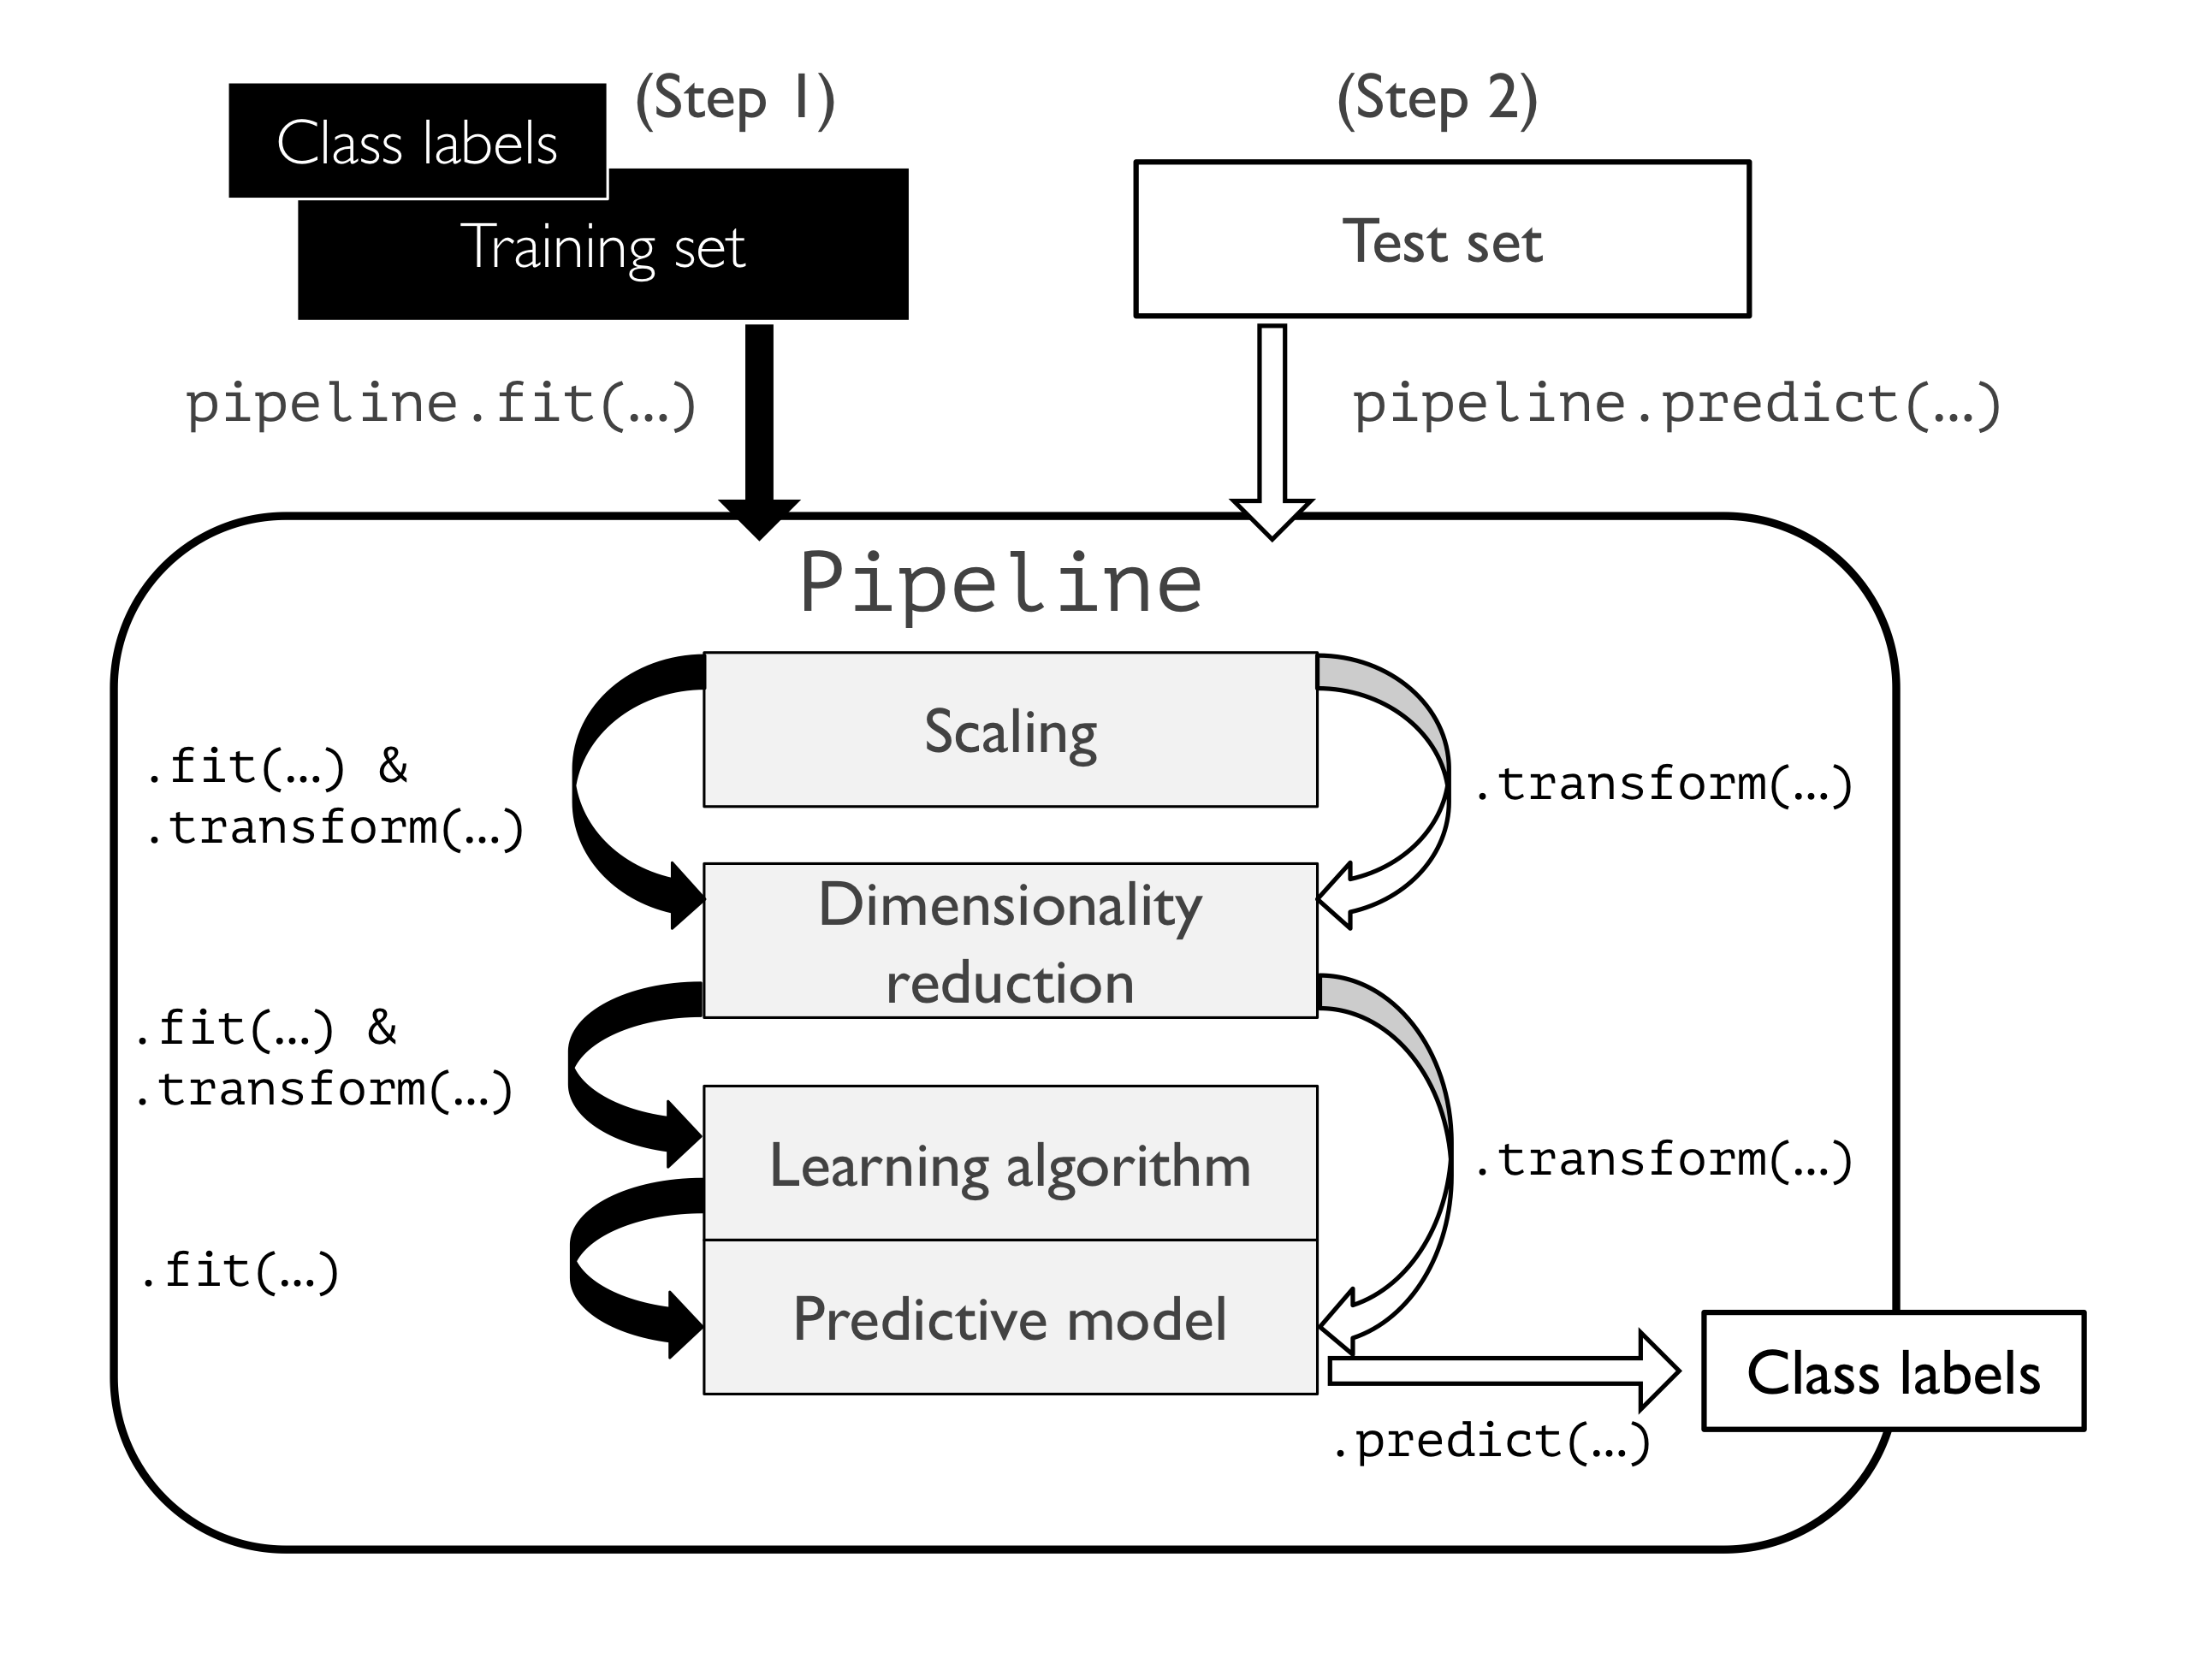

In [10]:
Image(filename='figures/06_01.png', width=500) 

Another Example

https://towardsdatascience.com/building-a-machine-learning-pipeline-3bba20c2352b

# Using k-fold cross validation to assess model performance

- Common cross-validation techniques 
  
  - holdout cross-validation 

  - k-fold cross-validation

- They help us to obtain reliable estimates of the model’s generalization performance, that is, how well the model performs on unseen data.

## The holdout method

- A classic and popular approach for estimating the generalization performance of machine learning models is the holdout method. Using the holdout method, we split our initial dataset into separate training and test datasets—the former is used for model training, and the latter is used to estimate its generalization performance

-  However, in typical machine learning applications, we are also interested in tuning and comparing different parameter settings to further improve the performance for making predictions on unseen data. This process is called model selection, with the name referring to a given classification problem for which we want to select the optimal values of tuning parameters (also called hyperparameters). 

-  However, if we reuse the same test dataset over and over again during model selection, it will become part of our training data and thus the model will be more likely to overfit. Despite this issue, many people still use the test dataset for model selection, which is not a good machine learning practice.

> A better way of using the holdout method for model selection is to separate the data into three parts: a training dataset, a validation dataset, and a test datase

> The training dataset is used to fit the different models, and the performance on the validation dataset is then used for model selectio

> A disadvantage of the holdout method is that the performance estimate may be very sensitive to how we partition the training dataset into the training and validation subsets; the estimate will vary for different examples of the data. k-fold cross-validation, where we repeat the holdout method k times on k subsets of the training data.

## K-fold cross-validation

- In k-fold cross-validation, we randomly split the training dataset into k folds without replacement. Here, k – 1 folds, the so-called training folds, are used for the model training, and one fold, the so-called test fold, is used for performance evaluation. 

- This procedure is repeated k times so that we obtain k models and performance estimates.

- We then calculate the average performance of the models based on the different, independent test folds to obtain a performance estimate that is less sensitive to the sub-partitioning of the training data compared to the holdout method. 

> Once we have found satisfactory hyperparameter values, we can retrain the model on the complete training dataset and obtain a final performance estimate using the independent test dataset. The rationale behind fitting a model to the whole training dataset after k-fold cross-validation is that first, we are typically interested in a single, final model (versus k individual models), and second, providing more training examples to a learning algorithm usually results in a more accurate and robust model.

Since k-fold cross-validation is a resampling technique without replacement, the advantage of this approach is that in each iteration, each example will be used exactly once, and the training and test folds are disjoint. Furthermore, all test folds are disjoint; that is, there is no overlap between the test folds. Figure 6.3 summarizes the concept behind k-fold cross-validation with k = 10. The training dataset is divided into 10 folds, and during the 10 iterations, 9 folds are used for training, and 1 fold will be used as the test dataset for model evaluation.

## Choosing K-fold for Small and Large Dataset

if we are working with relatively small training sets, it can be useful to increase the number of folds. If we increase the value of k, more training data will be used in each iteration, which results in a lower pessimistic bias toward estimating the generalization performance by averaging the individual model estimates. However, large values of k will also increase the runtime of the cross-validation algorithm and yield estimates with higher variance, since the training folds will be more similar to each other. On the other hand, if we are working with large datasets, we can choose a smaller value for k, for example, k = 5, and still obtain an accurate estimate of the average performance of the model while reducing the computational cost of refitting and evaluating the model on the different folds

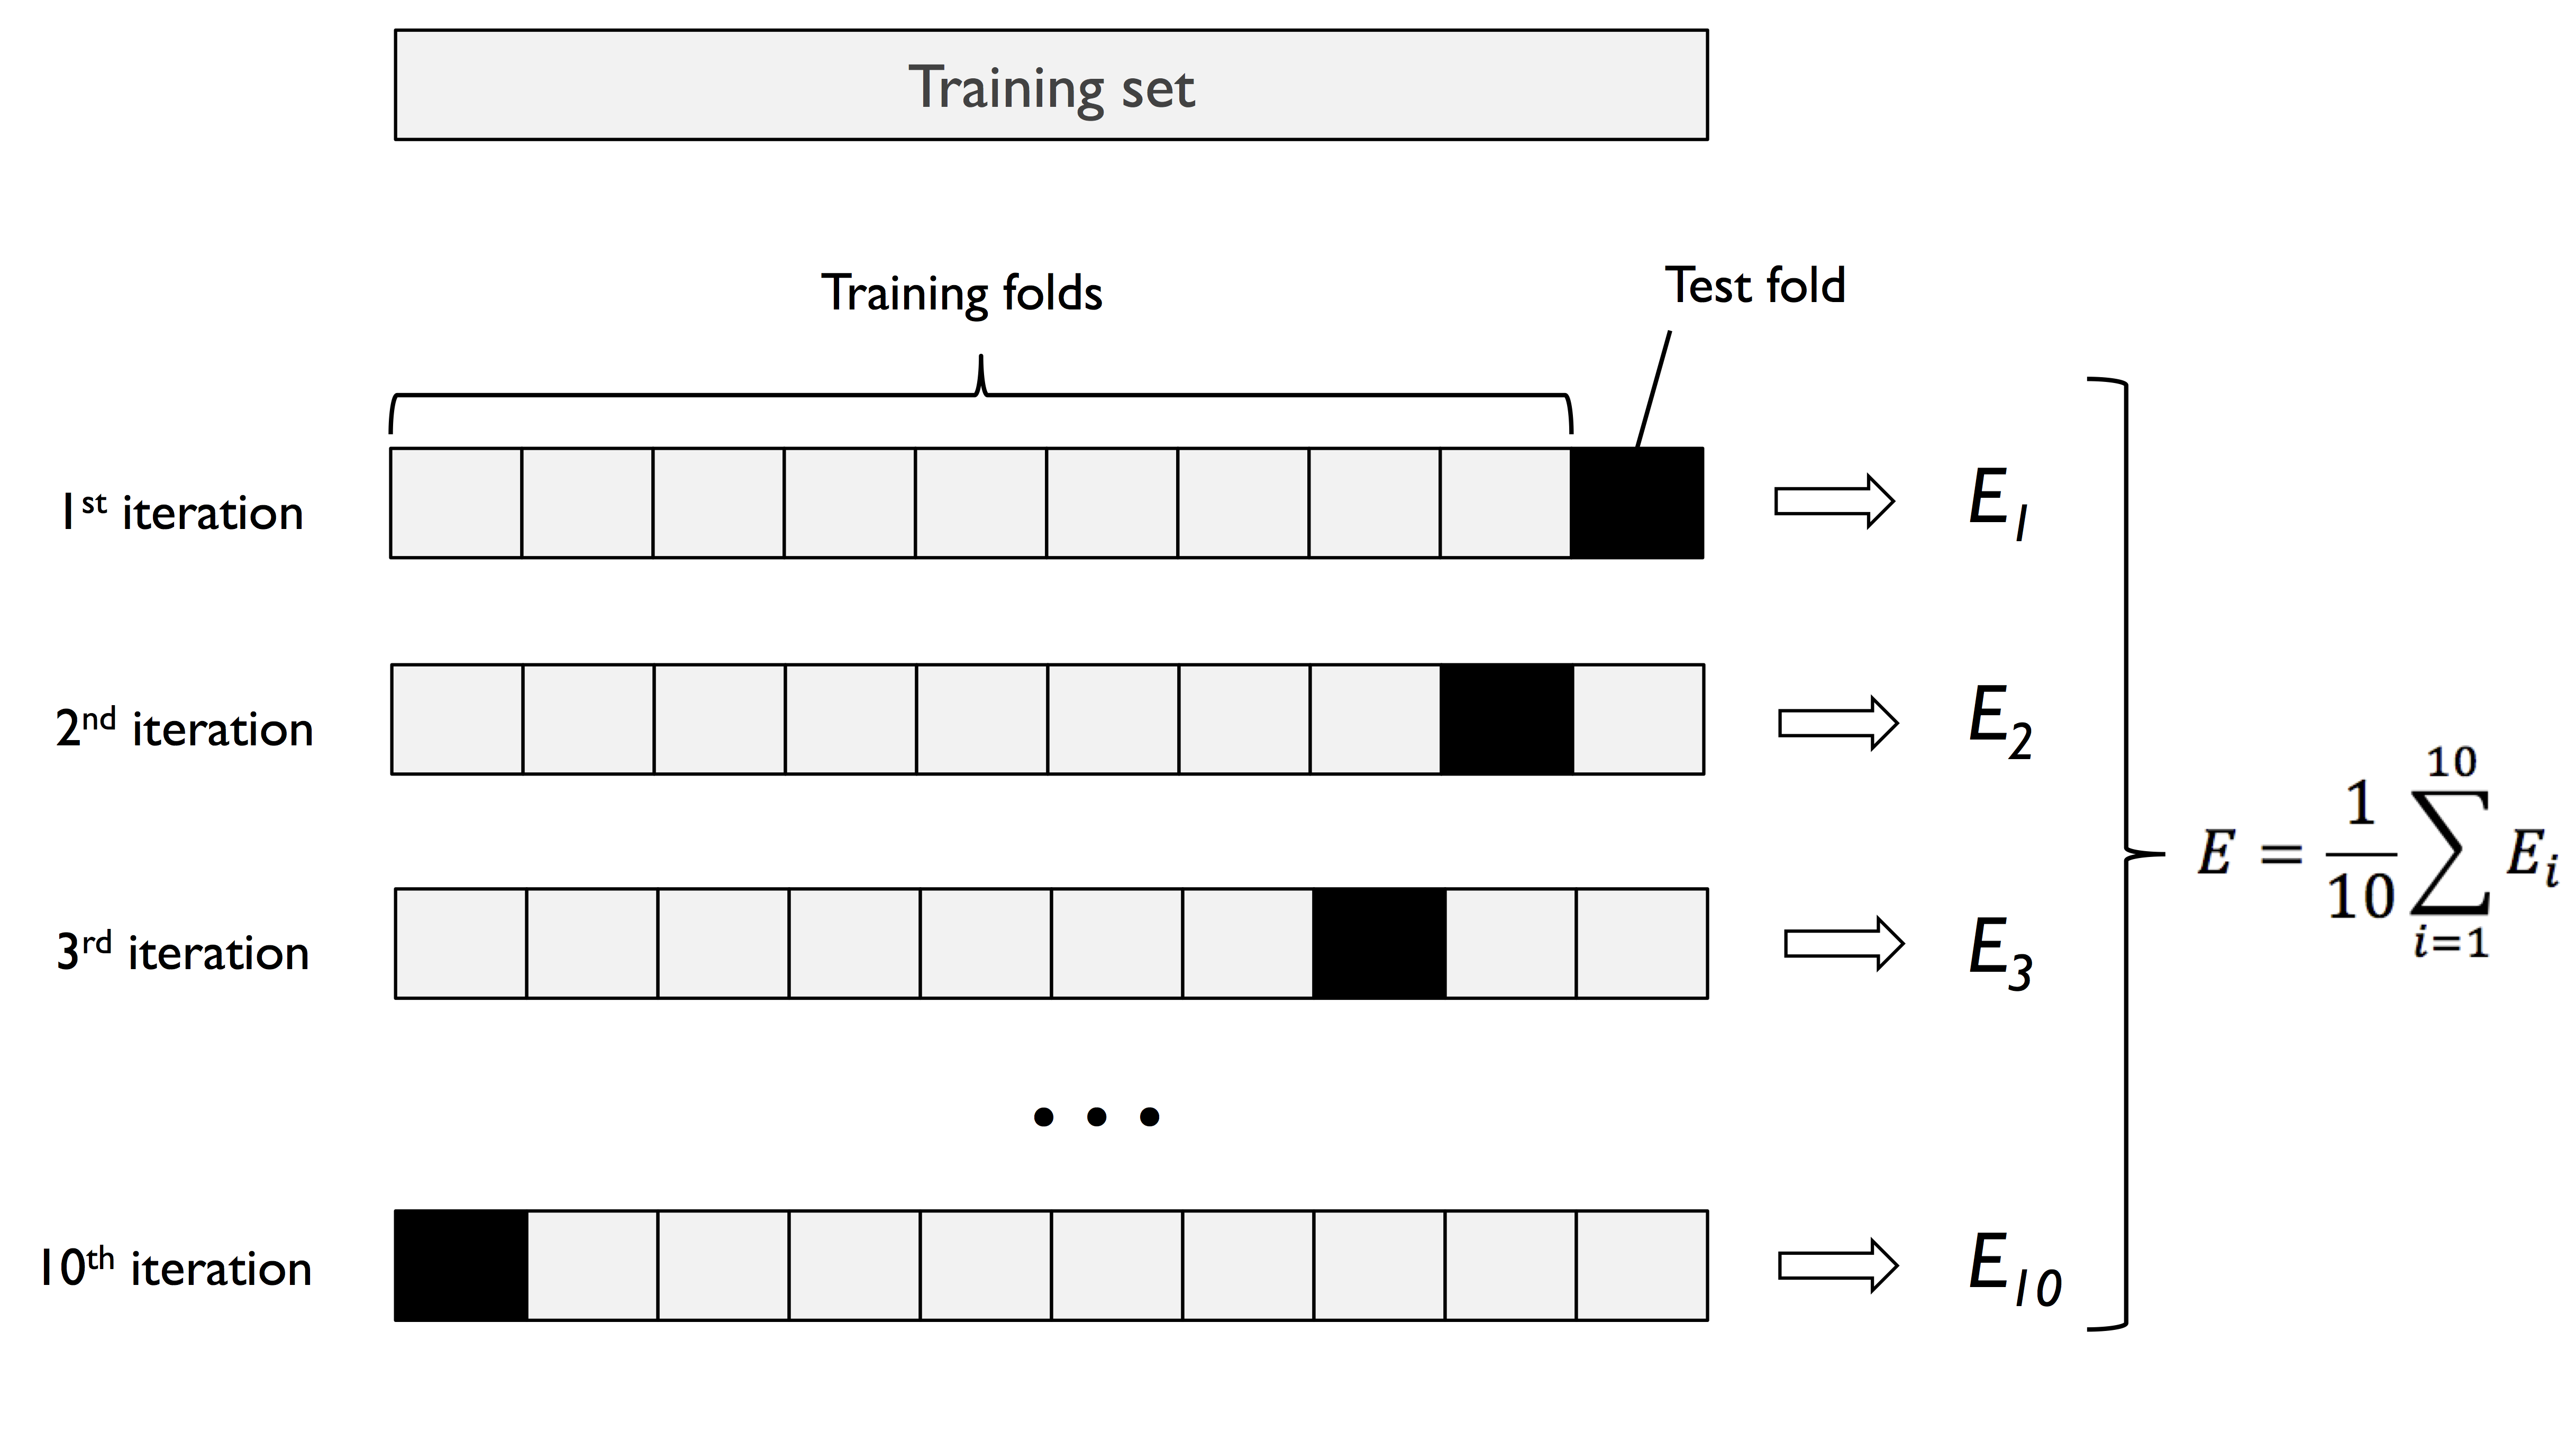

In [12]:
Image(filename='figures/06_03.png', width=500) 

> In summary, k-fold cross-validation makes better use of the dataset than the holdout method with a validation set, since in k-fold cross-validation all data points are being used for evaluation. A good standard value for k in k-fold cross-validation is 10.

### Stratified K-Fold cross validation

- A slight improvement over the standard k-fold cross-validation approach is stratified k-fold cross-validation, which can yield better bias and variance estimates, especially in cases of unequal class proportions, which has also been shown in the same study by Ron Kohavi referenced previously in this section. 
  
- In stratified cross-validation, the class label proportions are preserved in each fold to ensure that each fold is representative of the class proportions in the training dataset, which we will illustrate by using the StratifiedKFold iterator in scikit-learn:

In [18]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
    

kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)

    print(f'Fold: {k+1:02d}, '
          f'Class distr.: {np.bincount(y_train[train])}, '
          f'Acc.: {score:.3f}')
    
mean_acc = np.mean(scores)
std_acc = np.std(scores)
print(f'\nCV accuracy: {mean_acc:.3f} +/- {std_acc:.3f}')

Fold: 01, Class distr.: [256 153], Acc.: 0.935
Fold: 02, Class distr.: [256 153], Acc.: 0.935
Fold: 03, Class distr.: [256 153], Acc.: 0.957
Fold: 04, Class distr.: [256 153], Acc.: 0.957
Fold: 05, Class distr.: [256 153], Acc.: 0.935
Fold: 06, Class distr.: [257 153], Acc.: 0.956
Fold: 07, Class distr.: [257 153], Acc.: 0.978
Fold: 08, Class distr.: [257 153], Acc.: 0.933
Fold: 09, Class distr.: [257 153], Acc.: 0.956
Fold: 10, Class distr.: [257 153], Acc.: 0.956

CV accuracy: 0.950 +/- 0.014


### K-Fold Cross Validation in Python

In [20]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print(f'CV accuracy scores: {scores}')
print(f'CV accuracy: {np.mean(scores):.3f} '
      f'+/- {np.std(scores):.3f}')

CV accuracy scores: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]
CV accuracy: 0.950 +/- 0.014


> An extremely useful feature of the cross_val_score approach is that we can distribute the evaluation of the different folds across multiple central processing units (CPUs) on our machine. If we set the n_jobs parameter to 1, only one CPU will be used to evaluate the performances, just like in our StratifiedKFold example previously. However, by setting n_jobs=2, we could distribute the 10 rounds of cross-validation to two CPUs (if available on our machine), and by setting n_jobs=-1, we can use all available CPUs on our machine to do the computation in parallel.

# Debugging algorithms with learning curves

- We will take a look at two very simple yet powerful diagnostic tools that can help us to improve the performance of a learning algorithm: learning curves and validation curves.

- We will discuss how we can use learning curves to diagnose whether a learning algorithm has a problem with overfitting (high variance) or underfitting (high bias). 
  
- Furthermore, we will take a look at validation curves, which can help us to address the common issues of learning algorithms.

## Diagnosing bias and variance problems with learning curves

- If a model is too complex for a given training dataset—for example, think of a very deep decision tree—the model tends to overfit the training data and does not generalize well to unseen data. Often, it can help to collect more training examples to reduce the degree of overfitting.

- However, in practice, it can often be very expensive or simply not feasible to collect more data. By plotting the model training and validation accuracies as functions of the training dataset size, we can easily detect whether the model suffers from high variance or high bias, and whether the collection of more data could help to address this problem.

## Examples of Learning Curve and 

- The graph in the upper left shows a model with a high bias. This model has both low training and cross-validation accuracy, which indicates that it underfits the training data

- Common ways to address this issue are to increase the number of model parameters, for example, by collecting or constructing additional features, or by decreasing the degree of regularization, for example, in support vector machine (SVM) or logistic regression classifiers

-   

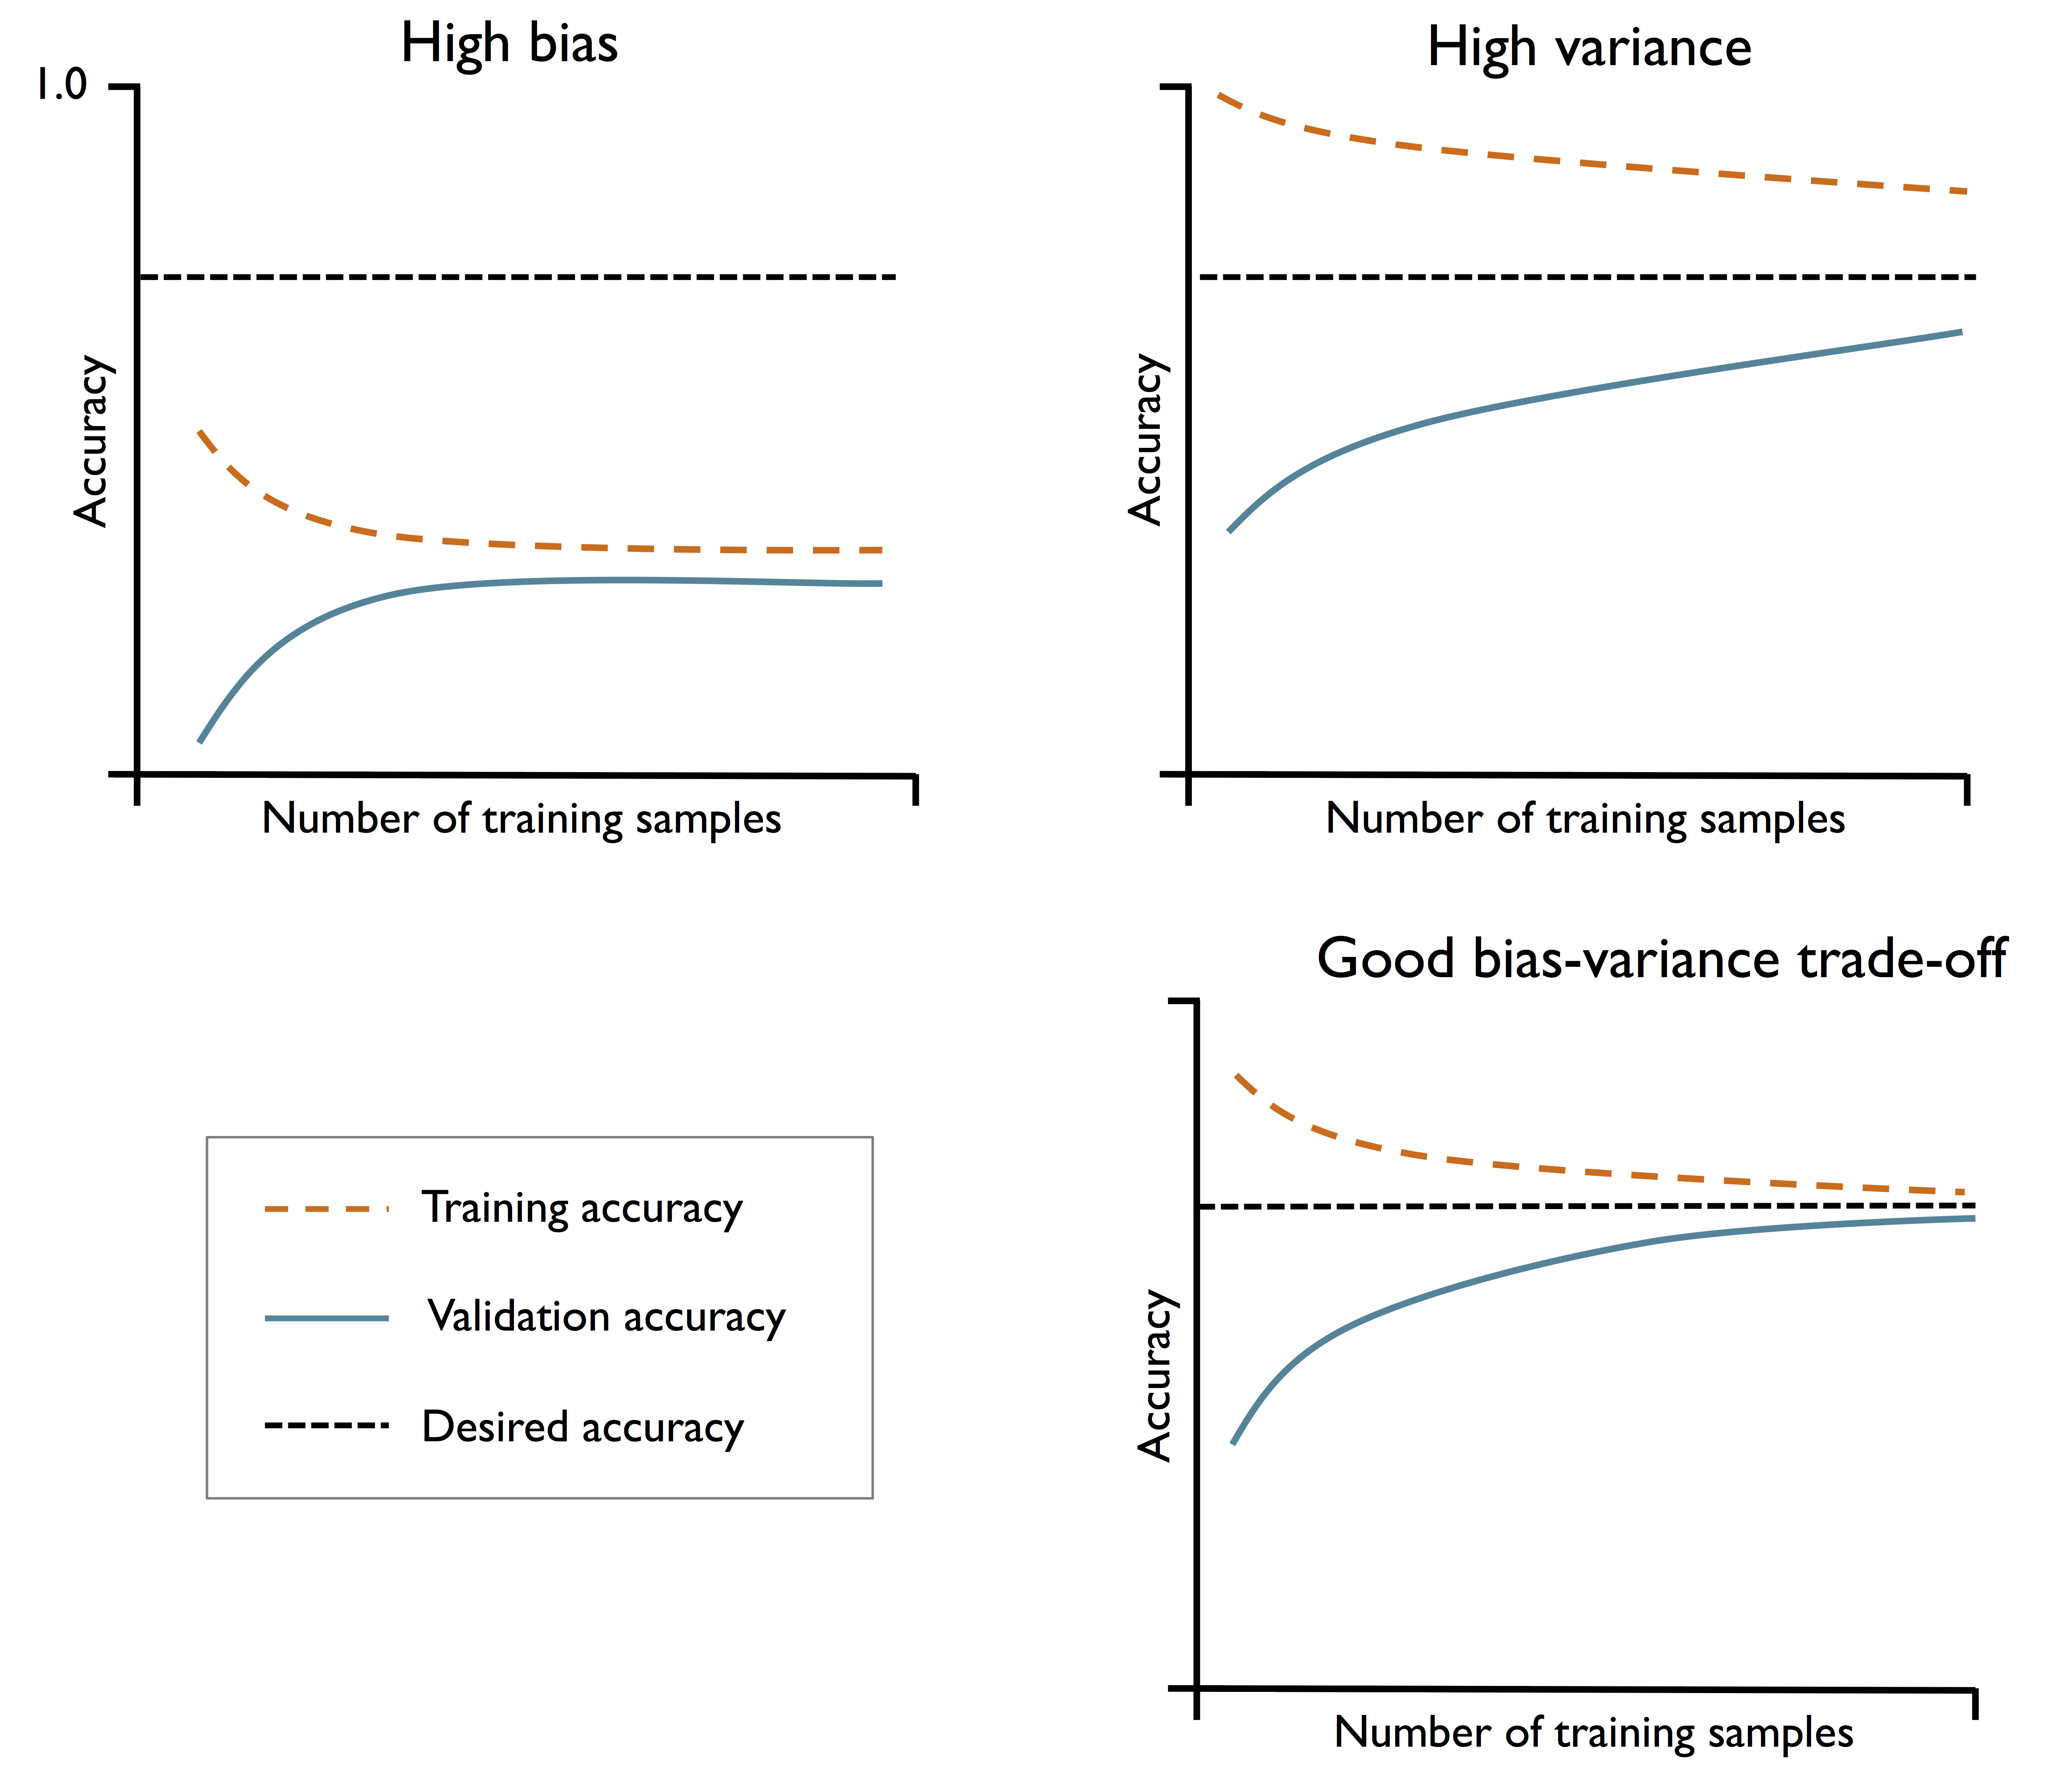

In [15]:
Image(filename='figures/06_04.png', width=600) 

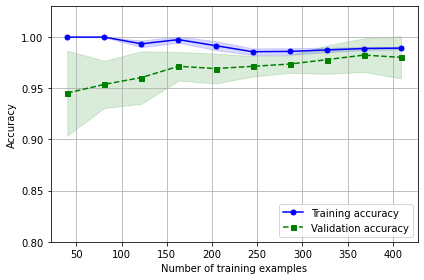

In [16]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', max_iter=10000))

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
# plt.savefig('figures/06_05.png', dpi=300)
plt.show()

<br>
<br>

## Addressing over- and underfitting with validation curves

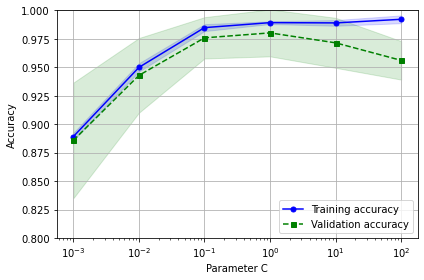

In [17]:
from sklearn.model_selection import validation_curve


param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                param_name='logisticregression__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('figures/06_06.png', dpi=300)
plt.show()

<br>
<br>

# Fine-tuning machine learning models via grid search

<br>
<br>

## Tuning hyperparameters via grid search 

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=10)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9846859903381642
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [19]:
clf = gs.best_estimator_

# clf.fit(X_train, y_train) 
# note that we do not need to refit the classifier
# because this is done automatically via refit=True.

print(f'Test accuracy: {clf.score(X_test, y_test):.3f}')

Test accuracy: 0.974


In [20]:
from sklearn.model_selection import RandomizedSearchCV


pipe_svc = make_pipeline(
    StandardScaler(),
    SVC(random_state=1))

param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
              {'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf']}]


rs = RandomizedSearchCV(estimator=pipe_svc,
                        param_distributions=param_grid,
                        scoring='accuracy',
                        refit=True,
                        n_iter=20,
                        cv=10,
                        random_state=1,
                        n_jobs=-1)

In [21]:
rs = rs.fit(X_train, y_train)
print(rs.best_score_)

0.9737681159420291


In [22]:
print(rs.best_params_)

{'svc__kernel': 'rbf', 'svc__gamma': 0.001, 'svc__C': 10.0}


## Exploring hyperparameter configurations more widely with randomized search

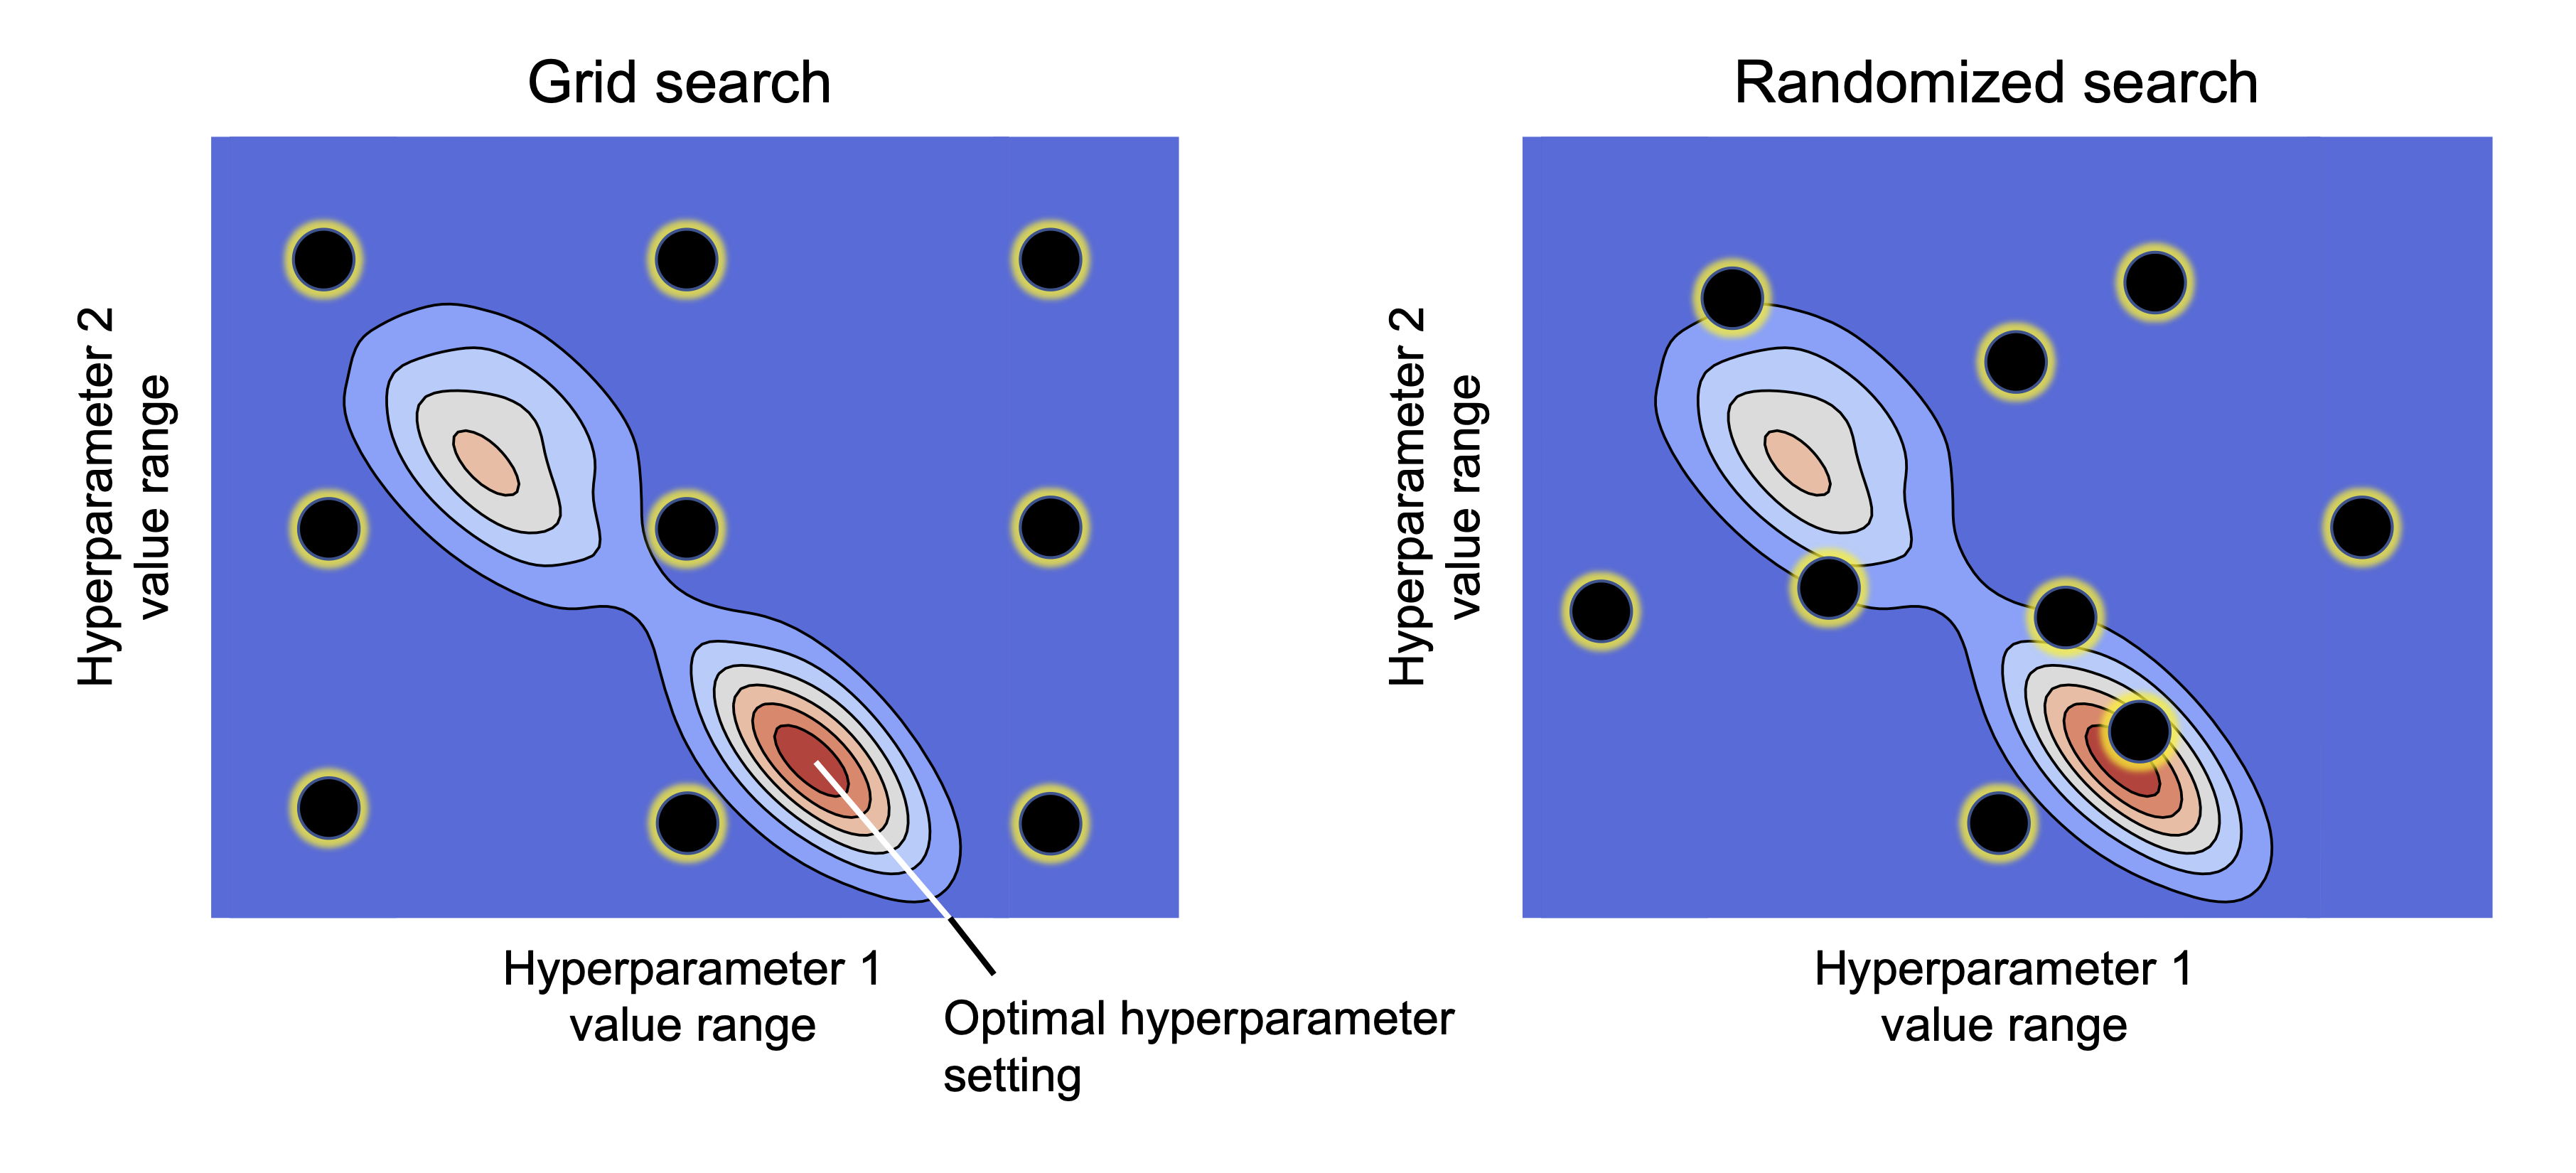

In [23]:
Image(filename='figures/06_11.png', width=600) 

In [24]:
import scipy.stats


param_range = [0.0001, 0.001, 0.01, 0.1,
               1.0, 10.0, 100.0, 1000.0]

param_range = scipy.stats.loguniform(0.0001, 1000.0)

np.random.seed(1)
param_range.rvs(10)

array([8.30145146e-02, 1.10222804e+01, 1.00184520e-04, 1.30715777e-02,
       1.06485687e-03, 4.42965766e-04, 2.01289666e-03, 2.62376594e-02,
       5.98924832e-02, 5.91176467e-01])

## More resource-efficient hyperparameter search with successive halving

In [25]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

In [26]:
hs = HalvingRandomSearchCV(
    pipe_svc,
    param_distributions=param_grid,
    n_candidates='exhaust',
    resource='n_samples',
    factor=1.5,
    random_state=1,
    n_jobs=-1)

In [27]:
hs = hs.fit(X_train, y_train)
print(hs.best_score_)
print(hs.best_params_)

0.9676470588235293
{'svc__kernel': 'rbf', 'svc__gamma': 0.0001, 'svc__C': 100.0}


In [28]:
clf = hs.best_estimator_
print(f'Test accuracy: {hs.score(X_test, y_test):.3f}')

Test accuracy: 0.965


<br>
<br>

## Algorithm selection with nested cross-validation

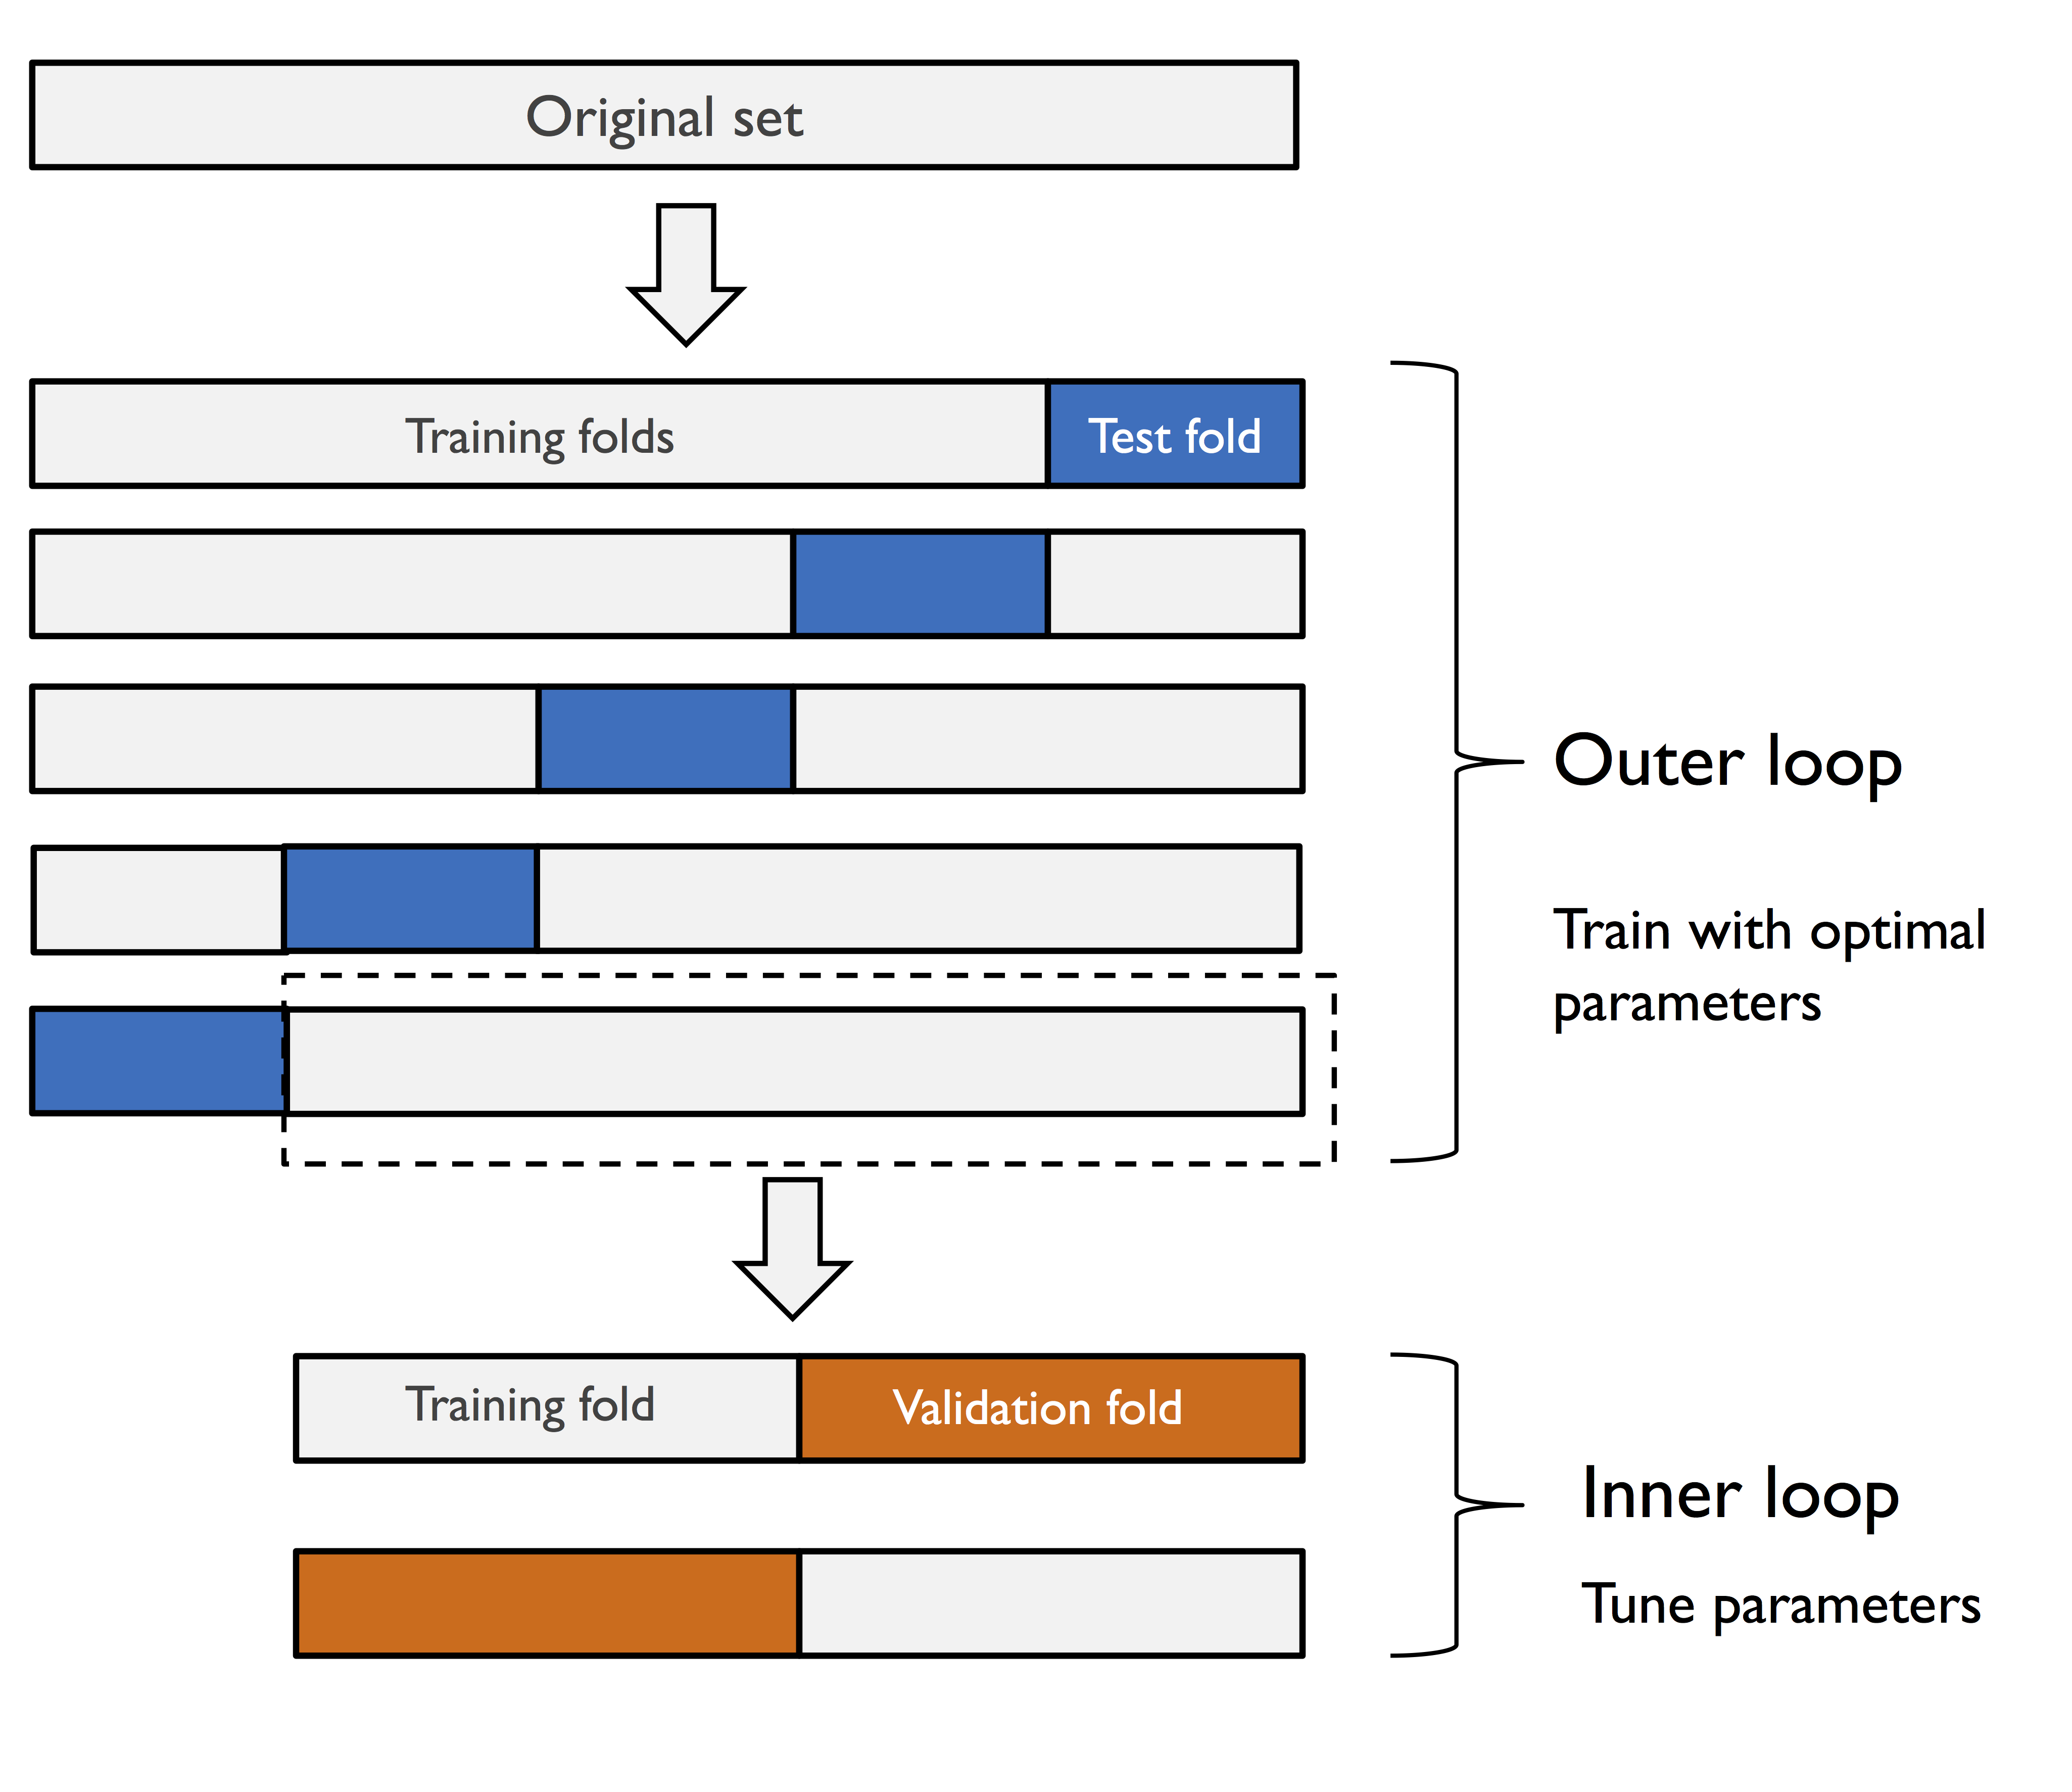

In [29]:
Image(filename='figures/06_07.png', width=500) 

In [30]:
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=2)

scores = cross_val_score(gs, X_train, y_train, 
                         scoring='accuracy', cv=5)
print(f'CV accuracy: {np.mean(scores):.3f} '
      f'+/- {np.std(scores):.3f}')

CV accuracy: 0.974 +/- 0.015


In [31]:
from sklearn.tree import DecisionTreeClassifier

gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
                  scoring='accuracy',
                  cv=2)

scores = cross_val_score(gs, X_train, y_train, 
                         scoring='accuracy', cv=5)
print(f'CV accuracy: {np.mean(scores):.3f} '
      f'+/- {np.std(scores):.3f}')

CV accuracy: 0.934 +/- 0.016


<br>
<br>

# Looking at different performance evaluation metrics

...

## Reading a confusion matrix

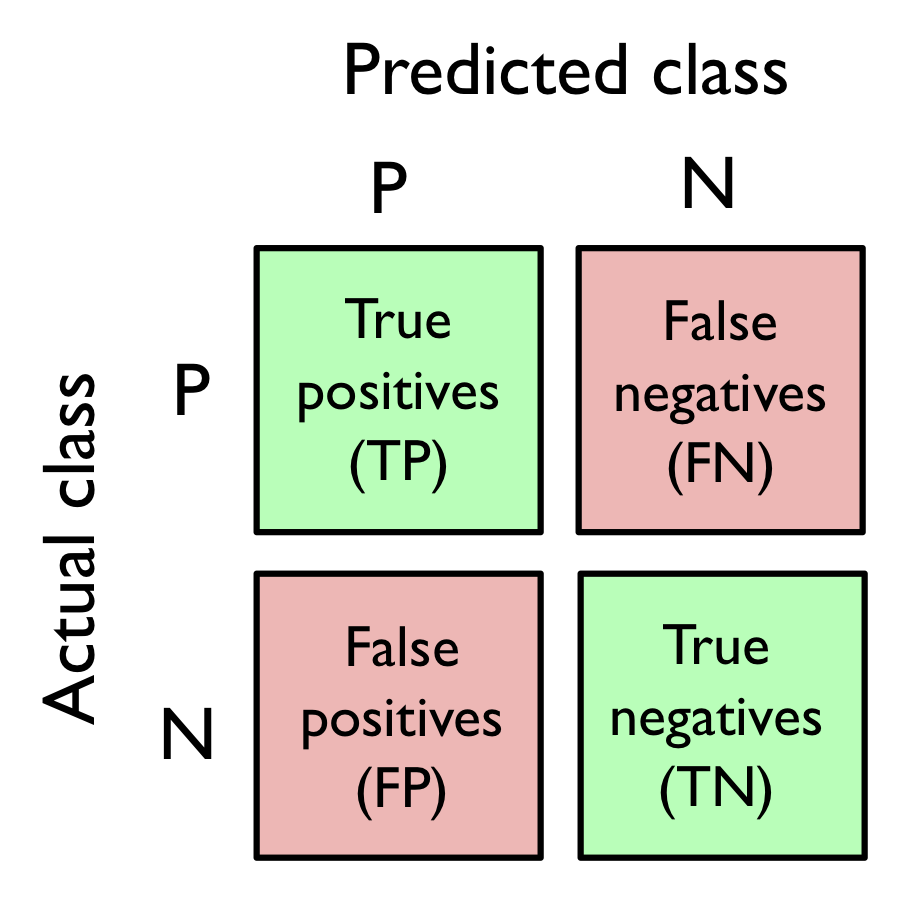

In [32]:
Image(filename='figures/06_08.png', width=300) 

In [33]:
from sklearn.metrics import confusion_matrix

pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


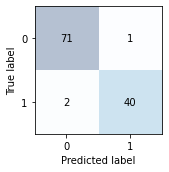

In [34]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
ax.xaxis.set_ticks_position('bottom')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('figures/06_09.png', dpi=300)
plt.show()

### Additional Note

Remember that we previously encoded the class labels so that *malignant* examples are the "postive" class (1), and *benign* examples are the "negative" class (0):

In [35]:
le.transform(['M', 'B'])

array([1, 0])

In [36]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


Next, we printed the confusion matrix like so:

In [37]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


Note that the (true) class 0 examples that are correctly predicted as class 0 (true negatives) are now in the upper left corner of the matrix (index 0, 0). In order to change the ordering so that the true negatives are in the lower right corner (index 1,1) and the true positves are in the upper left, we can use the `labels` argument like shown below:

In [38]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=[1, 0])
print(confmat)

[[40  2]
 [ 1 71]]


We conclude:

Assuming that class 1 (malignant) is the positive class in this example, our model correctly classified 71 of the examples that belong to class 0 (true negatives) and 40 examples that belong to class 1 (true positives), respectively. However, our model also incorrectly misclassified 1 example from class 0 as class 1 (false positive), and it predicted that 2 examples are benign although it is a malignant tumor (false negatives).

<br>
<br>

## Optimizing the precision and recall of a classification model

In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import matthews_corrcoef

pre_val = precision_score(y_true=y_test, y_pred=y_pred)
print(f'Precision: {pre_val:.3f}')

rec_val = recall_score(y_true=y_test, y_pred=y_pred)
print(f'Recall: {rec_val:.3f}')

f1_val = f1_score(y_true=y_test, y_pred=y_pred)
print(f'F1: {f1_val:.3f}')

mcc_val = matthews_corrcoef(y_true=y_test, y_pred=y_pred)
print(f'MCC: {mcc_val:.3f}')

Precision: 0.976
Recall: 0.952
F1: 0.964
MCC: 0.943


In [40]:
from sklearn.metrics import make_scorer

scorer = make_scorer(f1_score, pos_label=0)

c_gamma_range = [0.01, 0.1, 1.0, 10.0]

param_grid = [{'svc__C': c_gamma_range,
               'svc__kernel': ['linear']},
              {'svc__C': c_gamma_range,
               'svc__gamma': c_gamma_range,
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9861994953378878
{'svc__C': 10.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


<br>
<br>

## Plotting a receiver operating characteristic

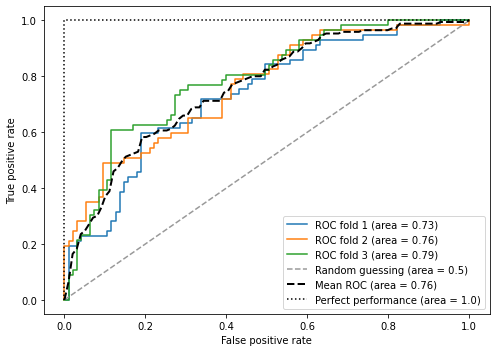

In [41]:
from sklearn.metrics import roc_curve, auc
from numpy import interp


pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(penalty='l2', 
                                           random_state=1,
                                           solver='lbfgs',
                                           C=100.0))

X_train2 = X_train[:, [4, 14]]
    

cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train],
                         y_train[train]).predict_proba(X_train2[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label=f'ROC fold {i+1} (area = {roc_auc:.2f})')

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing (area = 0.5)')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label=f'Mean ROC (area = {mean_auc:.2f})', lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance (area = 1.0)')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')

plt.tight_layout()
# plt.savefig('figures/06_10.png', dpi=300)
plt.show()

<br>
<br>

## The scoring metrics for multiclass classification

In [42]:
pre_scorer = make_scorer(score_func=precision_score, 
                         pos_label=1, 
                         greater_is_better=True, 
                         average='micro')

## Dealing with class imbalance

In [43]:
X_imb = np.vstack((X[y == 0], X[y == 1][:40]))
y_imb = np.hstack((y[y == 0], y[y == 1][:40]))

In [44]:
y_pred = np.zeros(y_imb.shape[0])
np.mean(y_pred == y_imb) * 100

89.92443324937027

In [45]:
from sklearn.utils import resample

print('Number of class 1 examples before:', X_imb[y_imb == 1].shape[0])

X_upsampled, y_upsampled = resample(X_imb[y_imb == 1],
                                    y_imb[y_imb == 1],
                                    replace=True,
                                    n_samples=X_imb[y_imb == 0].shape[0],
                                    random_state=123)

print('Number of class 1 examples after:', X_upsampled.shape[0])

Number of class 1 examples before: 40
Number of class 1 examples after: 357


In [46]:
X_bal = np.vstack((X[y == 0], X_upsampled))
y_bal = np.hstack((y[y == 0], y_upsampled))

In [47]:
y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred == y_bal) * 100

50.0

<br>
<br>

# Summary

...

---

Readers may ignore the next cell.

In [48]:
! python ../.convert_notebook_to_script.py --input ch06.ipynb --output ch06.py

[NbConvertApp] Converting notebook ch06.ipynb to script
[NbConvertApp] Writing 18900 bytes to ch06.py
